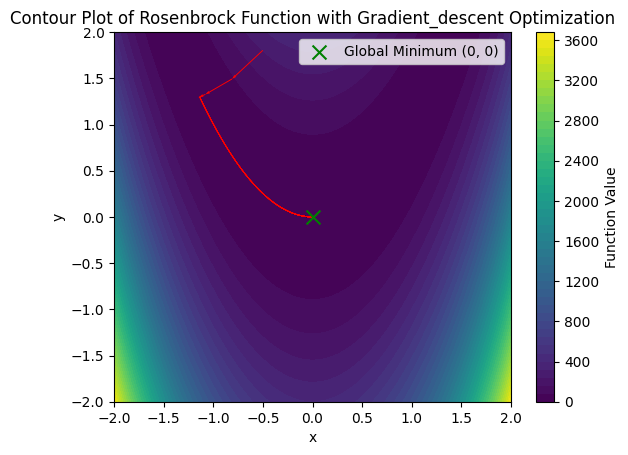

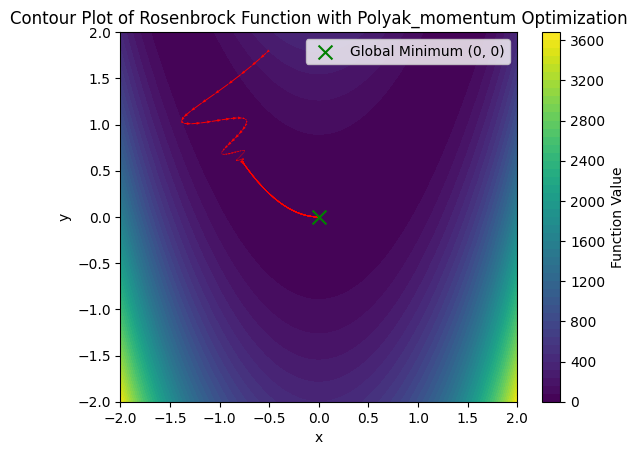

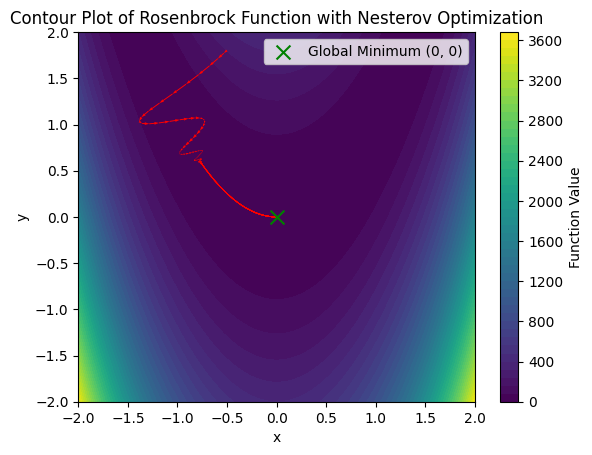

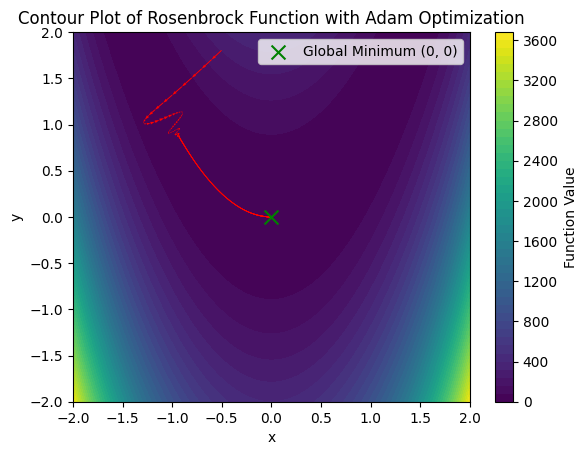

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class OptimizationVisualizer:
    def __init__(self, num_steps, learning_rate, function_type, optimization_method,global_minimum,local_minimum):
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.function_type = function_type
        self.optimization_method = optimization_method
        self.global_minimum=global_minimum
        self.local_minimum = local_minimum
        self.convergence_threshold = 1e-6

    def modify_parameters(self, num_steps, learning_rate, function_type, optimization_method,global_minimum,local_minimum):
        self.set_num_steps(num_steps)
        self.set_learning_rate(learning_rate)
        self.set_function_type(function_type)
        self.set_optimization_method(optimization_method)
        self.set_global_minimum(global_minimum)
        self.set_function_type(function_type)

    def set_num_steps(self,num_steps):
        self.num_steps=num_steps
    
    def set_learning_rate(self,learning_rate):
        self.learning_rate=learning_rate
    
    def set_function_type(self,function_type):
        self.function_type=function_type
    
    def set_optimization_method(self,optimization_method):
        self.optimization_method=optimization_method
    
    def set_global_minimum(self,global_minimum):
        self.global_minimum=global_minimum
    
    def set_local_minimum(self,local_minimum):
        self.local_minimum=local_minimum
        
    # Define the Rosenbrock function
    def rosenbrock(self,x,y):
        return x**2 + 100 * (y - x**2)**2
        
    def second_func(self,x,y):
        return 50/9*((x**2 + y**2)**3) - 209/18*((x**2 + y**2)**3) + 50/9*(((x**2 + y**2)**2))
    
    def func(self,x,y):
        if self.function_type=='rosenbrock':
            return self.rosenbrock(x,y)
        elif self.function_type=='second_func':
            return self.second_func(x,y)
        else:
            raise ValueError("Unsupported function type")
        
    # Define the gradient
    def gradient(self,x, y):  
        if self.function_type=='rosenbrock':
            df_dx = 2 * x - 400 * x * (y - x**2)
            df_dy = 200 * (y - x**2)
        elif self.function_type=='second_func':
            df_dx = 100/3 * (x**2 + y**2)*x - 200/9 * x + 200/9*(x**3 + x*(y**2))
            df_dy = 100/3 * (x**2 + y**2)*y - 200/9 * y + 200/9*(y**3 + (x**2)*y)
        else:
            raise ValueError("Unsupported function type")
        return np.array([df_dx, df_dy])
    
    def optimize_and_plot(self):
        np.random.seed(42)
        x = np.random.uniform(-2, 2)
        y = np.random.uniform(-2, 2)    
        
        x_list = [x]
        y_list = [y]
        f_list = [self.func(x, y)]

        # Perform optimization based on the selected optimization_method
        if self.optimization_method == 'gradient_descent':
            for i in range(self.num_steps):
                grad = self.gradient(x, y)
                x -= self.learning_rate * grad[0]
                y -= self.learning_rate * grad[1]
                
                # Append the updated values to the history lists
                x_list.append(x)
                y_list.append(y)
                f_list.append(self.func(x, y))
                
                if np.abs(grad[0]) < self.convergence_threshold and np.abs(grad[1]) < self.convergence_threshold:
                    break

        elif self.optimization_method == 'Polyak_momentum':
            momentum = 0.9 
            vx = 0
            vy = 0

            for i in range(self.num_steps):
                grad = self.gradient(x, y)            
                vx = momentum * vx - self.learning_rate * grad[0]
                vy = momentum * vy - self.learning_rate * grad[1]
                x += vx
                y += vy
                x_list.append(x)
                y_list.append(y)
                f_list.append(self.func(x, y))
                
                if np.abs(grad[0]) < self.convergence_threshold and np.abs(grad[1]) < self.convergence_threshold:
                    break

        elif self.optimization_method == 'Nesterov':
            momentum = 0.9
            vx = 0
            vy = 0 
            for i in range(self.num_steps):
                lookahead_x = x - self.learning_rate * momentum * vx
                lookahead_y = y -self. learning_rate * momentum * vy
                grad = self.gradient(lookahead_x, lookahead_y)
                vx = momentum * vx - self.learning_rate * grad[0]
                vy = momentum * vy - self.learning_rate * grad[1]
                x += vx
                y += vy
                x_list.append(x)
                y_list.append(y)
                f_list.append(self.func(x, y))
                
                if np.abs(grad[0]) < self.convergence_threshold and np.abs(grad[1]) < self.convergence_threshold:
                    break

        elif self.optimization_method == 'Adam':
            beta1 = 0.9  
            beta2 = 0.999 
            epsilon = 1e-8  
            m_x = 0
            m_y = 0
            v_x = 0
            v_y = 0
            
            for i in range(self.num_steps):
                grad = self.gradient(x, y)
                
                m_x = beta1 * m_x + (1 - beta1) * grad[0]
                m_y = beta1 * m_y + (1 - beta1) * grad[1]
                v_x = beta2 * v_x + (1 - beta2) * grad[0]**2
                v_y = beta2 * v_y + (1 - beta2) * grad[1]**2
                m_x_hat = m_x / (1 - beta1**(i+1))
                m_y_hat = m_y / (1 - beta1**(i+1))
                v_x_hat = v_x / (1 - beta2**(i+1))
                v_y_hat = v_y / (1 - beta2**(i+1))
                
                x -= self.learning_rate * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
                y -= self.learning_rate * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
                
                x_list.append(x)
                y_list.append(y)
                f_list.append(self.func(x, y))
                
                if np.abs(grad[0]) < self.convergence_threshold and np.abs(grad[1]) < self.convergence_threshold:
                    break

        else:
            raise ValueError("Unsupported optimization optimization_method")

        # Create a meshgrid for contour plot
        x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
        z_grid = self.func(x_grid, y_grid)

        # Create contour plot
        plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
        plt.colorbar(label='Function Value')

        # Plot arrows to show movement
        plt.quiver(x_list[:-1], y_list[:-1], np.diff(x_list), np.diff(y_list), scale_units='xy', angles='xy', scale=1, color='red')

        # Highlight the global minimum
        plt.scatter(*self.global_minimum, color='green', marker='x', s=100, label=f'Global Minimum {self.global_minimum}')

        # Set labels and legend
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        # Show the plot
        plt.title(f"Contour Plot of {self.function_type.capitalize()} Function with {self.optimization_method.capitalize()} Optimization")
        plt.show()

opt_vis=OptimizationVisualizer(10000,0.001,'rosenbrock','gradient_descent',(0,0),(0,0))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(10000,0.0001,'rosenbrock','Polyak_momentum',(0,0),(0,0))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(10000,0.0001,'rosenbrock','Nesterov',(0,0),(0,0))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(30000,0.1,'rosenbrock','Adam',(0,0),(0,0))
opt_vis.optimize_and_plot()

Function to minimize: f(x,y)=x^2 + 100(y − x^2)^2
The goal of the optimization process is to find the global minimum of the Rosenbrock function, which is located at the point (0, 0)

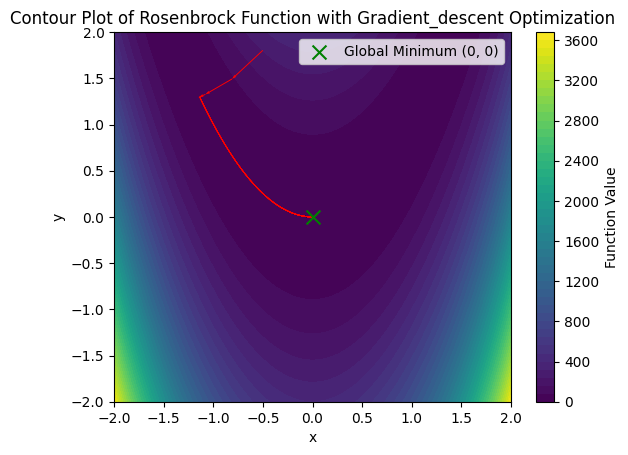

The code initializes x, y and uses gradient descent to optimize the Rosenbrock function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The background of the plot represents the contours of the Rosenbrock function
The red points represent the (x, y) coordinates at each iteration of the algorithm. As the algorithm progresses, it follows the steepest descent direction.
Each arrow represents a step taken by the algorithm.

Parameters used: 
num_steps:10000
learning rate: 0.001

From the obtained plot, we observe at the algorithm is able to reach the global minima within given number of iterations smoothly.


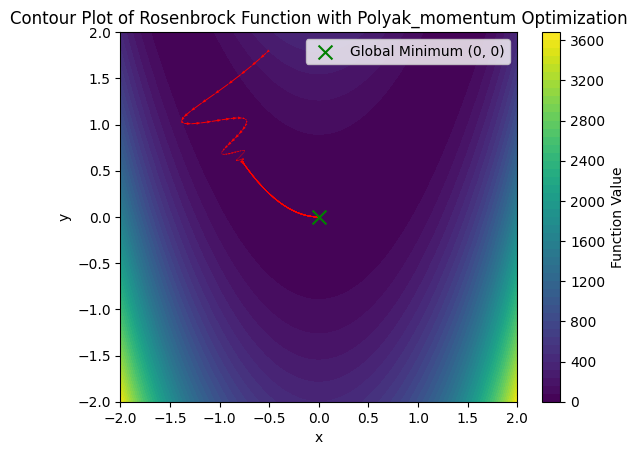

The code initializes x, y and uses Polyak's momentum to optimize the Rosenbrock function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
This method incorporates the concept of momentum, which is a moving average of past gradients.The momentum term allows the algorithm to "remember" its previous direction and velocity. As a result, it can continue moving in the same direction even if the current gradient suggests a change in direction.

Parameters used: 
num_steps:10000
learning rate: 0.0001
momentum = 0.9 
vx = 0
vy = 0

From the obtained plot, we observe at the algorithm is almost able to reach the global minima within given number of iterations.

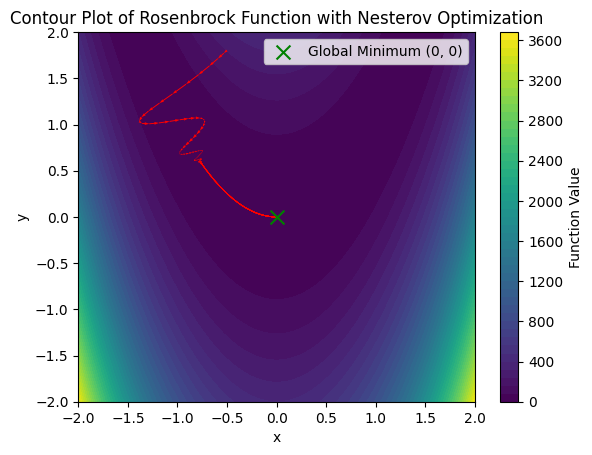

The code initializes x, y and uses Nesterov accelerated gradient descent to optimize the Rosenbrock function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The red points represent the (x, y) coordinates at each iteration of the optimization process using Nesterov's Accelerated Gradient Descent.
Each arrow represents the velocity and direction of movement.

The algorithm maintains a moving average of past gradients to influence the direction and speed of movement.Instead of evaluating the gradient at the current position, it evaluates the gradient slightly ahead in the direction of the momentum term. 

Parameters used: 
num_steps:10000
learning rate: 0.0001
momentum = 0.9 
vx = 0
vy = 0

From the obtained plot, we observe at the algorithm is almost able to reach the global minima within given number of iterations similar to Nesterov Gradient method.

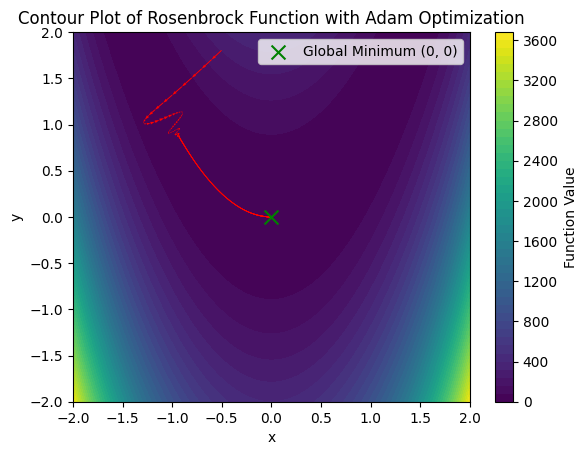

The code initializes x, y and uses Adam Optimizer to optimize the Rosenbrock function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The red points represent the (x, y) coordinates at each iteration of the optimization process using Adam Optimizer.
Each arrow represents the velocity and direction of movement.
v_x and v_y: These are the moving average of the gradients for the x and y parameters, respectively
m_x and m_y: These are the moving averages of the squared gradients for the x and y parameters, respectively.
β1 and β2: to control the weighting of past gradients and squared gradients.

Parameters used: 
num_steps:30000
learning rate: 0.1
momentum = 0.9 
beta1 = 0.9  
beta2 = 0.999 
epsilon = 1e-8  
m_x = 0
m_y = 0
v_x = 0
v_y = 0

From the obtained plot, we observe at the algorithm is able to reach the global minima within given number of iterations in a more smooth manner. Also, its learning rate is higher than any other algorithm.

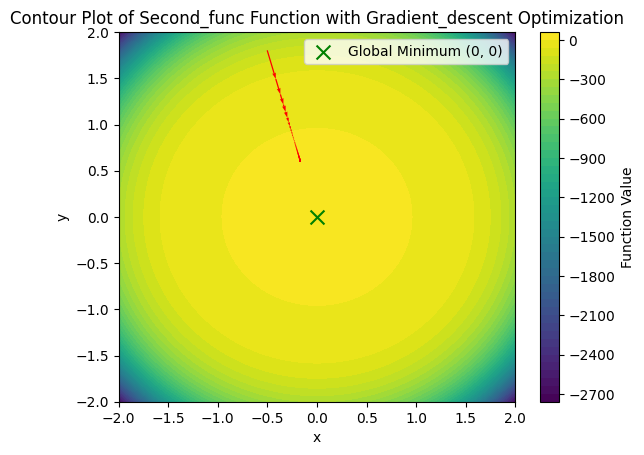

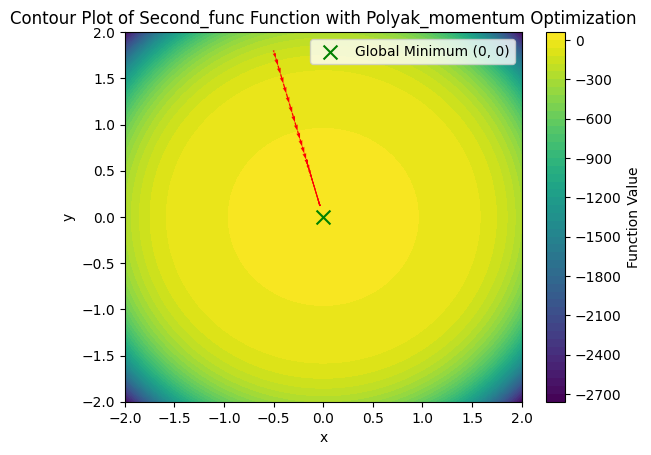

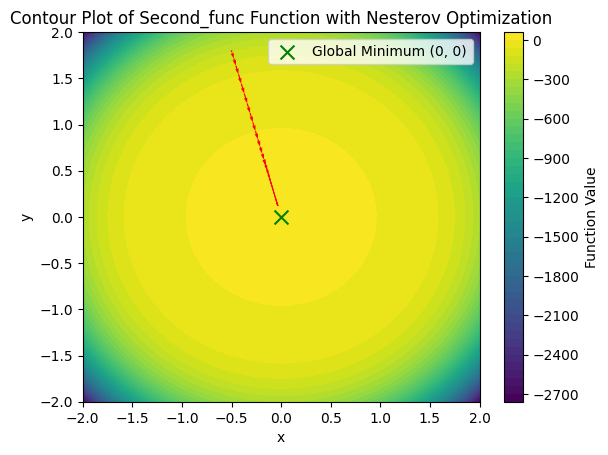

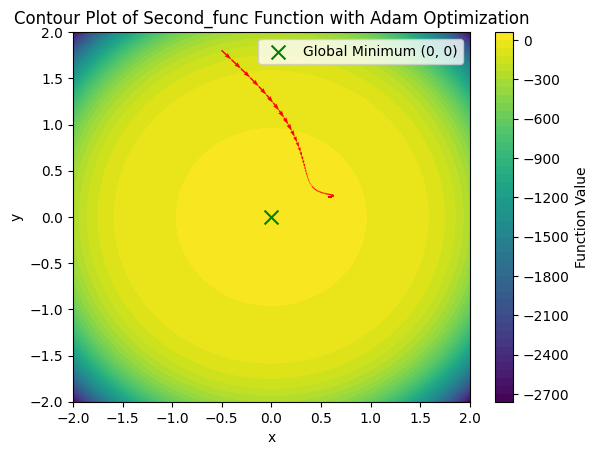

In [11]:
opt_vis.modify_parameters(10000,0.001,'second_func','gradient_descent',(0,0),(1,1))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(10000,0.0001,'second_func','Polyak_momentum',(0,0),(1,1))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(10000,0.0001,'second_func','Nesterov',(0,0),(1,1))
opt_vis.optimize_and_plot()
opt_vis.modify_parameters(30000,0.1,'second_func','Adam',(0,0),(1,1))
opt_vis.optimize_and_plot()

Function to minimize: f(x,y)= 50/9(x^2 +y^2)^3 − 20/9(x^2 +y^2)^2 + 5/9(x^2 +y^2).
The goal of the optimization process is to find the global minimum of the above function, which is located at the point (0, 0) but also has a local minima at x^2 + y^2 = 1

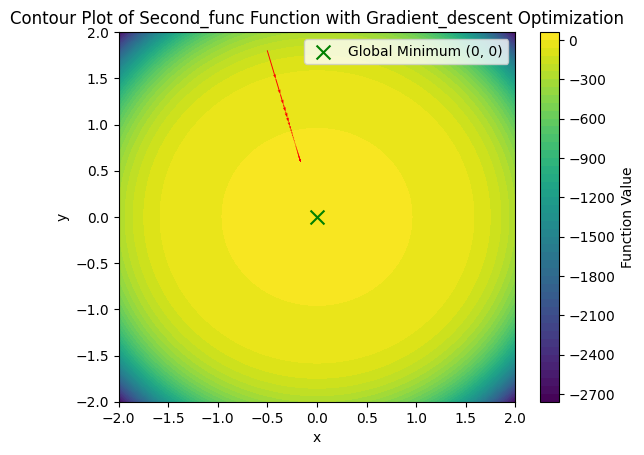

The code initializes x, y and uses gradient descent to optimize the function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The background of the plot represents the contours of the Rosenbrock function
The red points represent the (x, y) coordinates at each iteration of the algorithm. As the algorithm progresses, it follows the steepest descent direction or convergence citeria is met. 
Each arrow represents a step taken by the algorithm or convergence citeria is met. 

Parameters used: 
num_steps:10000
learning rate: 0.001

From the obtained plot, we observe at the algorithm is stuck at the periphery of local minima and could not reach global minima.

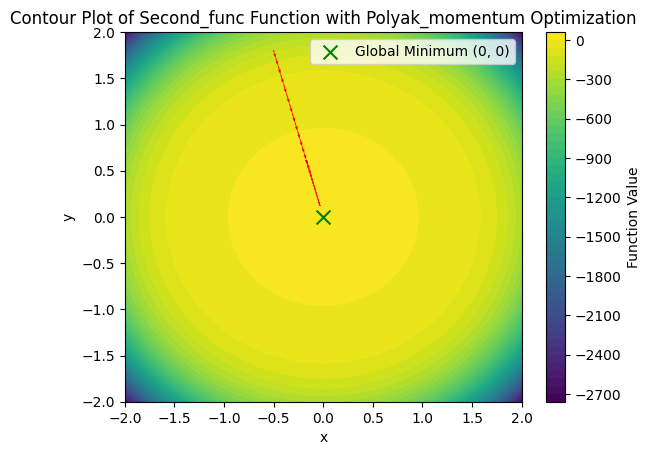

The code initializes x, y and uses Polyak's momentum to optimize the function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
This method incorporates the concept of momentum, which is a moving average of past gradients.The momentum term allows the algorithm to "remember" its previous direction and velocity. As a result, it can continue moving in the same direction even if the current gradient suggests a change in direction.

Parameters used: 
num_steps:10000
learning rate: 0.0001
momentum = 0.9 
vx = 0
vy = 0

From the obtained plot, we observe at the algorithm is almost able to reach the global minima within given number of iterations.

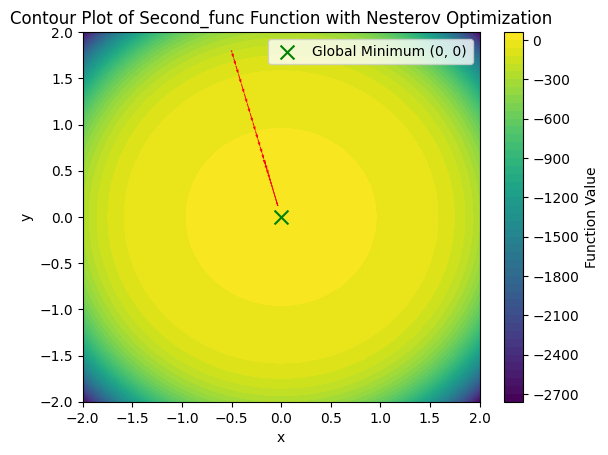

The code initializes x, y and uses Nesterov accelerated gradient descent to optimize the function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The red points represent the (x, y) coordinates at each iteration of the optimization process using Nesterov's Accelerated Gradient Descent.
Each arrow represents the velocity and direction of movement.

The algorithm maintains a moving average of past gradients to influence the direction and speed of movement.Instead of evaluating the gradient at the current position, it evaluates the gradient slightly ahead in the direction of the momentum term. 

Parameters used: 
num_steps:10000
learning rate: 0.0001
momentum = 0.9 
vx = 0
vy = 0

From the obtained plot, we observe at the algorithm is almost able to reach the global minima within given number of iterations.

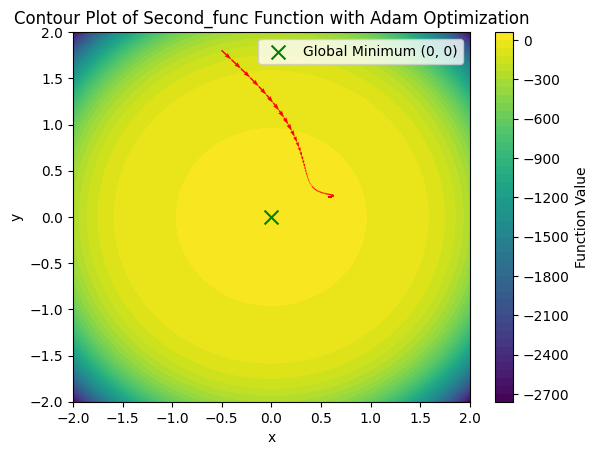

The code initializes x, y and uses Adam Optimizer to optimize the function.The algorithm stops after a maximum number of iterations is reached or convergence citeria is met. 
The red points represent the (x, y) coordinates at each iteration of the optimization process using Adam Optimizer.
Each arrow represents the velocity and direction of movement.
v_x and v_y: These are the moving average of the gradients for the x and y parameters, respectively
m_x and m_y: These are the moving averages of the squared gradients for the x and y parameters, respectively.
β1 and β2: to control the weighting of past gradients and squared gradients.

Parameters used: 
num_steps:30000
learning rate: 0.1
momentum = 0.9 
beta1 = 0.9  
beta2 = 0.999 
epsilon = 1e-8  
m_x = 0
m_y = 0
v_x = 0
v_y = 0

From the obtained plot, we observe at the algorithm is diverges from global minima towards local minima and could not reach global minima.